# 선형 회귀분석의 기초

회귀분석(regression analysis)은 독립 변수 $x$와 이에 대응하는 종속 변수 $y$간의 관계를 정량화하는 작업이다. 

$$ \hat{y} = f \left( x \right) \approx y $$

**선형 회귀분석**(linear regression analysis): 

- $ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx $

**모수**(parameter): 

- 위 식에서 $w_0, \cdots, w_D$, 함수 $f(x)$의 계수(coefficient) 

**바이어스 오그멘테이션**(bias augmentation):

- 상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$
- 오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$


$$
f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a$$

In [20]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [21]:
# 바이어스 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

**StatsModels**
에는 바이어스 오그멘테이션을 위한 ** add_constant** 함수가 제공된다.

In [22]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

# OLS

**OLS(Ordinary Least Squares)**는 가장 기본적인 결정론적 선형 회귀 방법으로

**잔차제곱합(RSS: Residual Sum of Squares)**를 최소화하는 가중치 벡터를 행렬 **미분**으로 구하는 방법이다.

 예측 모형(바이어스 오그멘트된 선형 모형) : 
 $ \hat{y} = Xw $

잔차 벡터와 잔차 제곱합 
$$ e = {y} - \hat{y} = y - Xw $$

$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

미분(그레디언트(gradient) 벡터)

$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터

$$ \dfrac{d \text{RSS}}{d w}  = 0 $$

$$ X^TX w^{\ast} = X^T y $$

$$  w^{\ast} = (X^TX)^{-1} X^T y $$

그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 **정규 방정식(Normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

$$ X^T (y - X w ) = X^T e = 0 $$

즉, $x_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터라고 할 때 

모든 차원 $d \; (d=1, \ldots, D)$에 대해 **  $x_d$는 잔차 벡터 $e$와 수직 **을 이룬다.

$$ x_d^T e = 0 \;\;\; (d=1, \ldots, D) $$
$$x_d \perp e \;\;\; (d=1, \ldots, D) $$

# NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형회귀분석을 하는 예제

In [23]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [24]:
coef

array(80.71051956)

$$y = 100 + 80.7105 x + e$$

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

In [26]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w  # 샘플이 100개뿐이라 정확하진 않게 된다

array([[102.02701439],
       [ 81.59750943]])

즉, 다음 방정식을 이용하여 y를 예측한다.

$$ \hat{y} = 102.0270 + 81.5975 x $$

In [27]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[102.02701439],
       [ 81.59750943]])

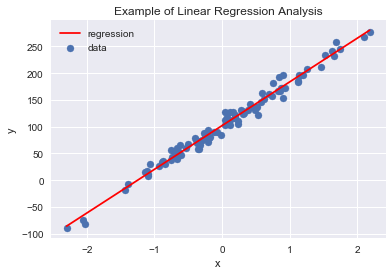

In [28]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 바이어스 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

# Scikit-Learn 패키지를 사용한 선형회귀분석

`linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 
1. `LinearRegression` 클래스 객체 생성
    ```
    model = LinearRegression(fit_intercept=True)
    ```
    상수항이 없으면 `fit_intercept=False`로 설정한다.

2. `fit` 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.
    ```
    model = model.fit(X, y)
    ```
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 `fit` 메서드는 객체 자신을 반환한다.
    * `coef_` : 추정된 가중치 벡터
    * `intercept_` : 추정된 상수항 

3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    ```
    y_new = model.predict(x_new)
    ```

In [30]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target) # `LinearRegression` 클래스 객체 생성
model_boston.coef_                                                # `fit` 메서드로 모형 추정

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [31]:
model_boston.intercept_

36.49110328036104

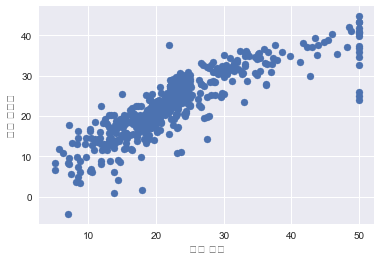

In [32]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

# StatsModels 를 사용한 선형회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.


1. `OLS` 클래스 객체 생성. 
 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.
    ```
    model = OLS(y, X)
    ```
    
2. `fit` 메서드로 모형 추정. 
    
        Scikit-Learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    
    ```
    result = model.fit()
    ```

3. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

In [33]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        18:27:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

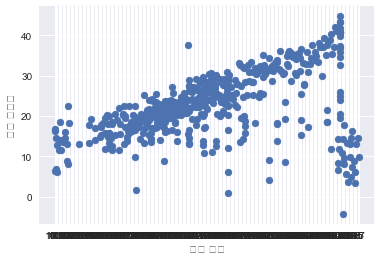

In [34]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

In [35]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, 
                                       columns=boston.feature_names), 
                          has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,4.0,11.0,11.0,0.1,0.6,6.0,70.0,4.0,10.0,410.0,20.0,360.0,13.0


In [36]:
result_boston2.predict(dfx_new)

0    18.854172
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* `resid`: 잔차 벡터
* `params`: 모수 벡터

In [37]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [39]:
result_boston2.resid.head()

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

이외에도 StatsModels 패키지는 회귀분석 결과를 살펴볼 수 있는 다양한 메서드와 도구를 제공한다.

`plot_regress_exog` 명령은 StatsModels 패키지가 제공하는 분석용 함수의 한 예이다.

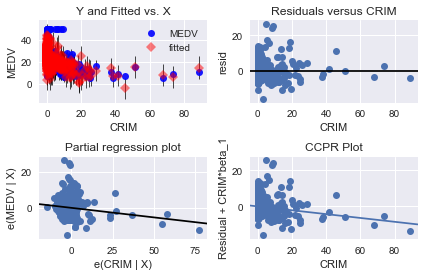

In [40]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()